# Sample for On-Balance Volume (OBV) of daily data

In [10]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import re
import yfinance as yf

pattern = re.compile(r"(.+)\.T")
# pattern = re.compile(r'\^(.+)')

symbol = "260A.T"
ticker = yf.Ticker(symbol)

df = ticker.history(period="3mo", interval="1d")
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-01-24 00:00:00+09:00,567.0,579.0,567.0,578.0,911100,0.0,0.0
2025-01-27 00:00:00+09:00,585.0,589.0,567.0,567.0,805400,0.0,0.0
2025-01-28 00:00:00+09:00,562.0,591.0,553.0,587.0,1383900,0.0,0.0
2025-01-29 00:00:00+09:00,592.0,635.0,587.0,604.0,3376200,0.0,0.0
2025-01-30 00:00:00+09:00,621.0,622.0,583.0,583.0,1739500,0.0,0.0


## On-Balance Volume

In [11]:
def calc_obv(r):
    if r == 0:
        return 0

    obv_prev = list_obv[r - 1]
    close_prev = df.iloc[r - 1]["Close"]
    close_curr = df.iloc[r]["Close"]
    volume_curr = df.iloc[r]["Volume"]

    if close_prev < close_curr:
        v_sign = +1
    elif close_prev > close_curr:
        v_sign = -1
    else:
        v_sign = 0

    return obv_prev + volume_curr * v_sign


list_obv = list()
for r in range(len(df)):
    list_obv.append(calc_obv(r))

## Charts

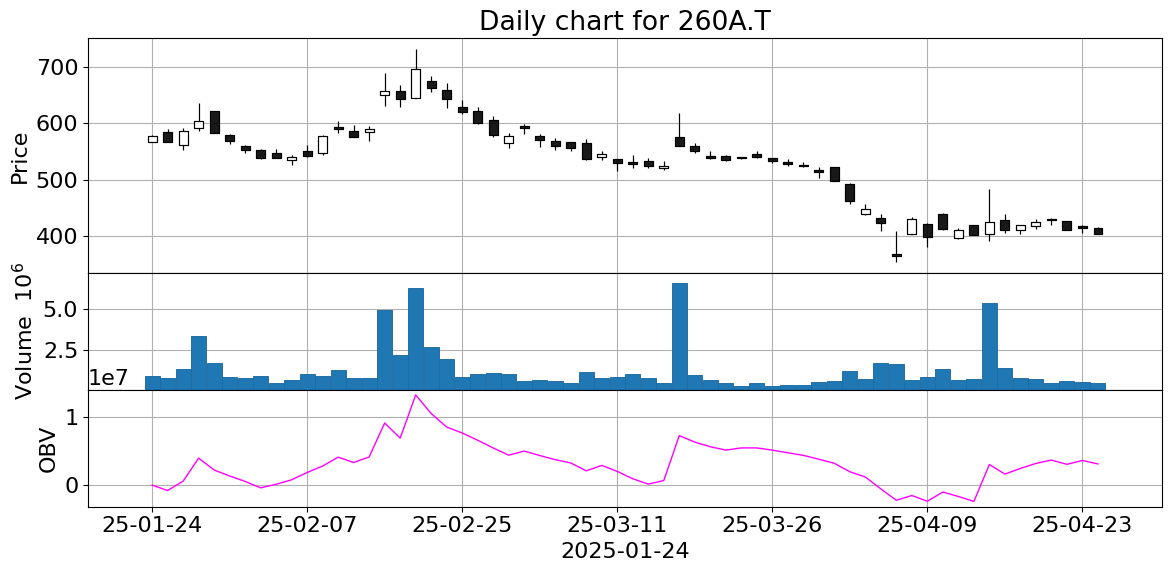

In [12]:
plt.rcParams["font.size"] = 16
fig = plt.figure(figsize=(12, 6))

ax = dict()
n = 3
gs = fig.add_gridspec(
    n, 1, wspace=0.0, hspace=0.0, height_ratios=[2 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex="col")):
    ax[i] = axis
    ax[i].grid()

apds = [
    mpf.make_addplot(list_obv, width=1, color="magenta", ax=ax[2]),
]

mpf.plot(
    df,
    type="candle",
    style="default",
    volume=ax[1],
    datetime_format="%y-%m-%d",
    addplot=apds,
    xrotation=0,
    ax=ax[0],
)

ax[2].set_ylabel("OBV")
ax[2].set_xlabel(df.index[0].date())

try:
    ax[0].set_title("Daily chart for %s (%s)" % (ticker.info["longName"], symbol))
except KeyError:
    ax[0].set_title("Daily chart for %s" % symbol)

plt.tight_layout()

m = pattern.match(symbol)
if m:
    plt.savefig("daily_chart_%s.png" % m.group(1))
else:
    plt.savefig("daily_chart_%s.png" % symbol)

plt.show()